In [1]:
import sys,os,glob,copy
sys.path.append('../')
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d
import matplotlib as mpl
from matplotlib.colors import LogNorm
from IPython.display import display, Markdown
from collections import OrderedDict
import pylhe
import glob
import pyslha

delphesDir = os.path.abspath("../../MG5/Delphes")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT
import xml.etree.ElementTree as ET


ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

Welcome to JupyROOT 6.26/10


# Set Delphes output file

In [2]:

inputFiles =  {'ADD(MD=2,n=2)' : '../add_2_2_delphes_events.root',
              'ADD(MD=2,n=6)' : '../add_2_6_delphes_events.root',}

# Load events, get parton level and detector level MET

In [3]:
pTj1 = {label : np.array([]) for label in inputFiles}
weights = {label : np.array([]) for label in inputFiles}
met = {label : np.array([]) for label in inputFiles}
genMet = {label : np.array([]) for label in inputFiles}
totalweight = {label : 0.0 for label in inputFiles}

mG = {label : [] for label in inputFiles}
for label,inputFile in inputFiles.items():

    f = ROOT.TFile(inputFile,'read')
    tree = f.Get("Delphes")
    nevts = tree.GetEntries()
    print('Total MC events=',nevts)
    
    for ievt in range(nevts):    
        tree.GetEntry(ievt)        
        missingET = tree.MissingET.At(0)
        w = tree.Weight
        totalweight[label] += w.At(0).Weight
        genMissingET = tree.GenMissingET.At(0)  # USE REAL MISSING ET!
        dmMissingET = tree.DMMissingET.At(0)  # USE REAL MISSING ET!
#         particles = tree.Particle
        dmParticles = tree.dmParticles
        if dmParticles.GetEntries() != 1:
            print(dmParticles.GetEntries(),'found')
            break
        mG[label].append(dmParticles.At(0).Mass)
#         stableParticles = tree.StableParticles
#         break
#     break
    f.Close()


Total MC events= 15000
Total MC events= 15000


### Plot Distributions

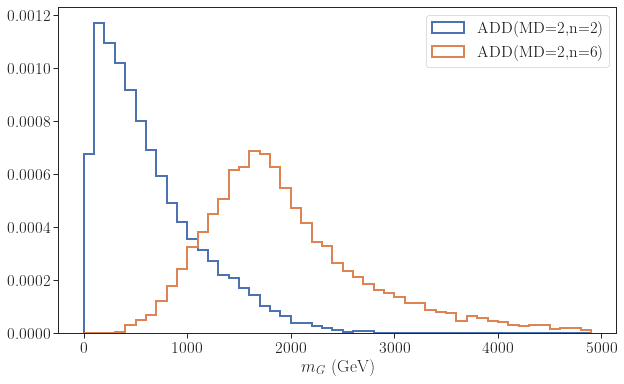

In [6]:
fig = plt.figure(figsize=(10,6))
for label in mG:
    plt.hist(mG[label],bins=np.arange(0.,5000.,100.),density=True,
             histtype='step',linewidth=2,label=label)
    
        
# plt.yscale('log')
# plt.ylim(1e-4,1e0)
plt.xlabel(r'$m_{G}$ (GeV)')
# plt.ylabel(r'$\frac{d\sigma}{d p_T^{miss}}$ (pb)')
# plt.xlim(0,1000)
plt.legend()
# plt.title(r'$m_{G} = %1.2f \pm %1.2f$' %(np.mean(mG),np.std(mG)))
plt.show()